In [16]:
#packages import

import numpy as np
import random
from scipy.special import erf
import matplotlib.pyplot as plt
from scipy.stats import norm

## Simulation , Exercice 1

1) 
Simulate $n$ independant samples of a gaussian variable $ \mathcal N ( \mu, \sigma)$


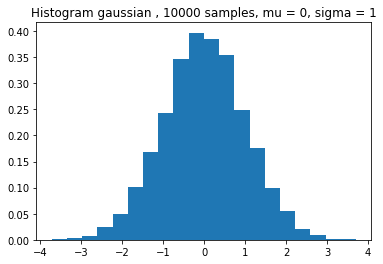

In [17]:
def simu_gaussian( n = 500, mu = 0, sigma = 1):
    return np.random.normal(mu, sigma, n)


def plot_gaussian(n, mu = 0, sigma  = 1 , nbins = 20):
    fig, ax = plt.subplots(1)
    X = simu_gaussian(n, mu, sigma)
    ax.hist(X, bins = nbins, density = True)
    ax.set_title('Histogram gaussian , {} samples, mu = {}, sigma = {}'.format(n, mu, sigma))
    plt.show()

plot_gaussian(10000)


2) Now let's suppose (X, Y) is a gaussian vector, and that $cov(X, Y) = c$. 
Simulate $n$ samples of $X$ and $Y$.

Since $(X, Y)$ is gaussian, one can write 
$$X = aY + W$$
where W is gaussian and independant from Y. 
Because $(X, Y)$ is gaussian, so is $(W, Y)$. But for gaussian vector, uncorolaed is equivalent to independant.

  \begin{align}
  0 &= cov(W, Y)\\
 &= cov(X - aY, Y) \\
  &= cov (X, Y) - a \;var(Y)\\
  &= c - a \;var(Y)
\end{align}
Hence, $a = \frac c {\sigma_Y^2}$

It is necessary to know the mean and the variance of $W$. 
$$E (W) = E   (X) - a E (Y)$$
Then for the variance :
$$\begin{align}
var(X)  &=var (aY) + var (W)& \text{by independance}\\
var (W) &= var(X) - a^2 \; var(Y)
\end{align}$$

It is now easy to simulate a sample of  X and Y




In [18]:
def simu_correlation(n, muX = 0, sigmaX = 1, muY = 0, sigmaY = 1, cov = 0):

    a = cov/ (sigmaY**2)
    Y = simu_gaussian(n, muY, sigmaY)
    varW = sigmaX** 2-a*a* sigmaY**2
    muW = muX - a*muY
    W = simu_gaussian(n, muW, np.sqrt(varW))
    X = a*Y + W
    return X, Y

def plot_correlation(n, muX = 0, sigmaX = 1, muY = 0, sigmaY = 1, cov = 0):
    X, Y = simu_correlation(n, muX, sigmaX, muY, sigmaY, cov)
    fig, ax = plt.subplots(1)
    ax.hist(X, label = 'X ', alpha = 0.5, density = True)
    ax.hist(Y, label = 'Y', alpha = 0.5, density = True)
    ax.set_title('Histogram correlation, {} samples, covariance = {}'.format(n, cov))
    plt.show()

  

3) Here , the goal is to simulate the variable $ X \sim \mathcal N (\mu, \sigma)$, given that $X \geq m$. 

Two methods are implemented. 
First, acceptance-rejection method. 

It is simple to implement, however, it is not really efficient, as the acceptance rate is $< 1/2$. The expected value of the number of samplings for 1 acceptance is $\frac 1 {1 - cdf_{\mathcal N(\mu, \sigma)}(m)} > 1$. 

In [19]:
def simu_greater_rejection( n, mu = 0, sigma = 1, m=2 ):
    T = np.zeros(n)
    for k in range(n):
        r = random.gauss(mu, sigma)
        while r < m :
            r = random.gauss(mu, sigma)
        T[k] = r
    return T

    

A more efficient method would be to simulate $X$ via the inverse CDF method. 
Let's denote $ \mu_X$ the density of X. Then $\mu_X(x) = 1_{x \geq 2} \exp(-\frac {(x- \mu)^2}{2\sigma^2}) \times C$, where $C = \frac 1 {\int_{-\infty}^{\infty} \mu_x (x) dx} = \frac 1 {1 - cdf_{\mathcal N (\mu , \sigma)}(m)}$, so that $\mu_X$ is a probability. 

Now it is easy to calculate the cumulative distribution fonction of $X$ :

$cdf_X(x) = 1_{x \geq m} \times  C \times  \left(cdf_{\mathcal N (\mu , \sigma)}(x) - cdf_{\mathcal N (\mu , \sigma)}(m)\right)$. 

One can check that $cdf_X(m) = 0$ and that $cdf_X(+\infty) = 1$ so no evident mistake was made. 

Now let's compute it. 




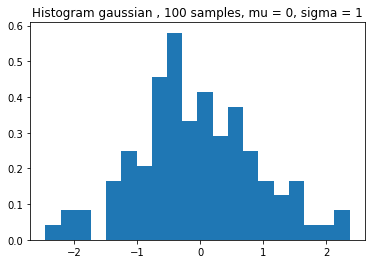

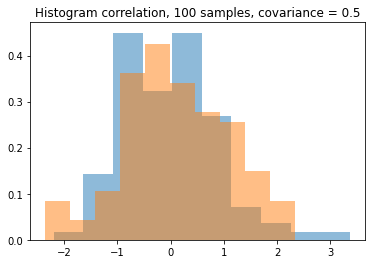

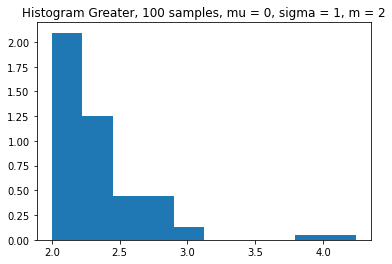

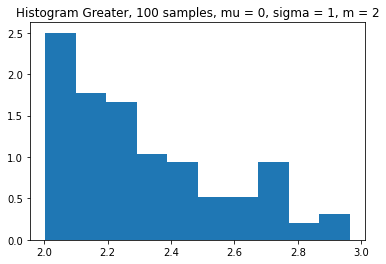

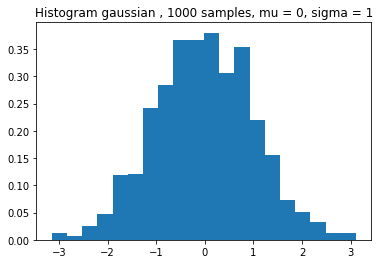

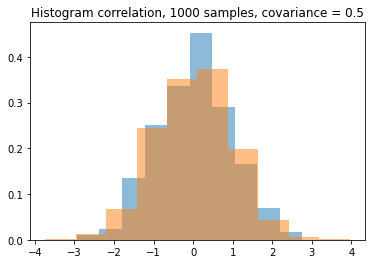

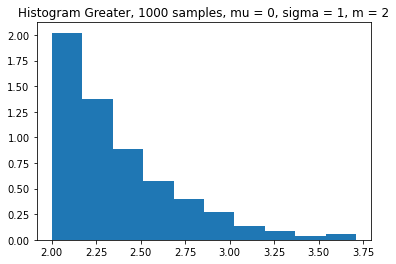

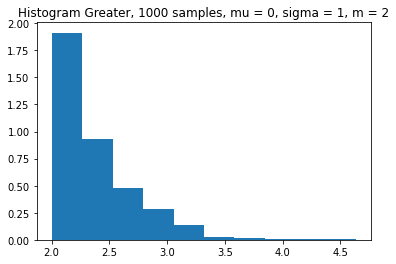

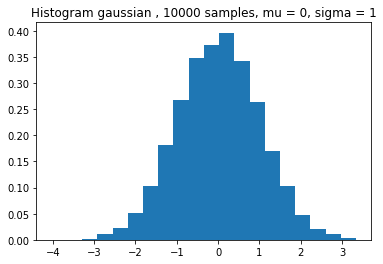

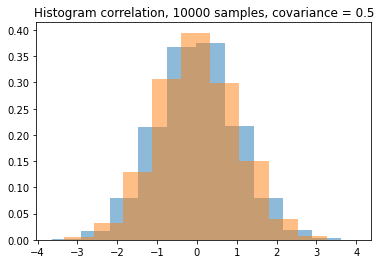

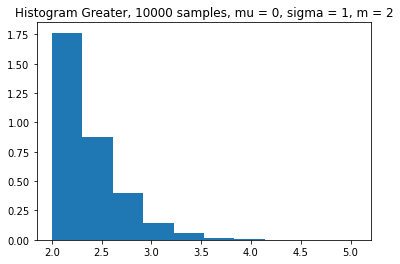

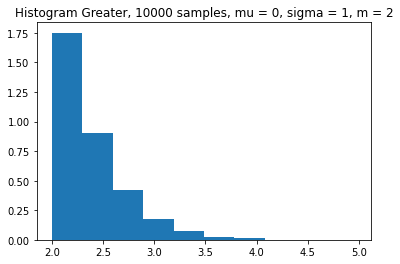

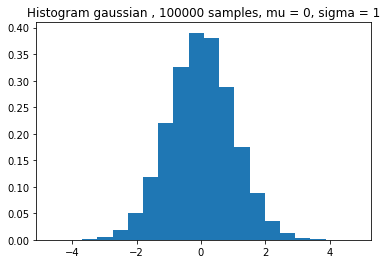

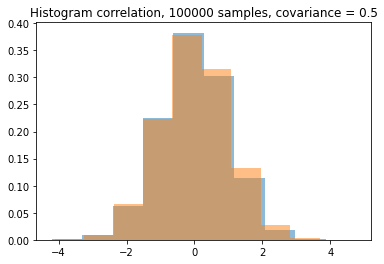

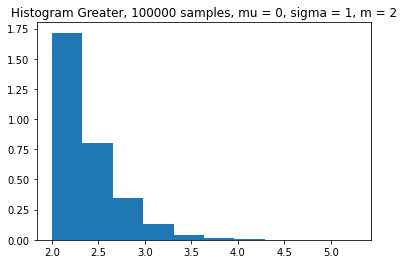

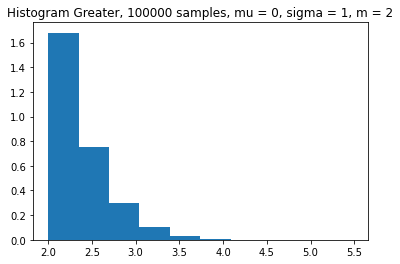

In [20]:
def simu_greater_inverse(n, mu = 0, sigma = 1, m = 2):
    # k is usefull for normalisation/standarisation, to use directly the function norm.cdf and norm.ppf
    k = (m- mu)/sigma
    T = np.zeros(n)

    for i in range(n) :
        u = random.uniform(0,1)
        t =norm.cdf(k)+ u*(1- norm.cdf(k))
        T[i] = norm.ppf(t)*sigma + mu
    return T
def plot_greater(n , m = 2 ,mu = 0, sigma = 1,rejet = False):
    if rejet :
        X = simu_greater_rejection(n, mu, sigma,m)
    else :
        X = simu_greater_inverse(n, mu, sigma, m)
    fig, ax = plt.subplots(1)
    ax.hist(X, density = True)
    ax.set_title('Histogram Greater, {} samples, mu = {}, sigma = {}, m = {}'.format(n, mu, sigma, m))
    plt.show()



4) Now the objective is to simulate $X \lvert(Y \geq m )$, knowing that $(X, Y)$ is a gaussian vector and that $cov(X, Y) = c$.
Considering the questions 2 and 3, it is fairly easy. 


In [23]:
def simu_cor_greater(n, muX = 0, sigmaX = 1 , muY = 0,  sigmaY = 1, cov = 0.5, m = 2):
  Y = simu_greater_inverse(n, mu = muY, sigma = sigmaY)
  a = cov/ (sigmaY**2)
  varW = sigmaX** 2-a*a* sigmaY**2
  muW = muX - a*muY
  W = simu_gaussian(n, muW, np.sqrt(varW))
  X = a*Y + W
  return X, Y

def plot_cor_greater(n, muX = 0, sigmaX = 1 , muY = 0,  sigmaY = 1, cov = 0.5, m = 2, nbins = 20):
  X, Y = simu_cor_greater(n, muX, sigmaX, muY, sigmaY, cov, m)
  fig, ax = plt.subplots(1)
  ax.hist(X, label = 'X ', alpha = 0.5, density = True)
  ax.hist(Y, label = 'Y', alpha = 0.5, density = True)
  ax.set_title('Histogram correlation greater than {}, {} samples, covariance = {}'.format(m,n, cov))
  plt.show()

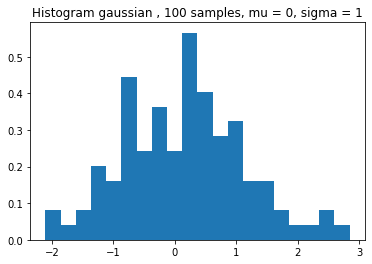

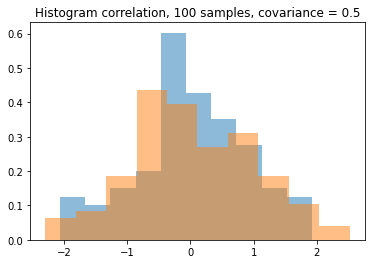

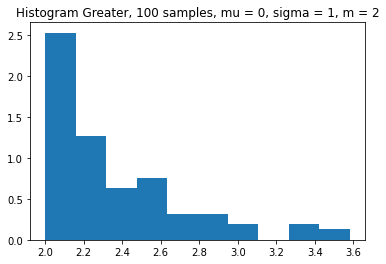

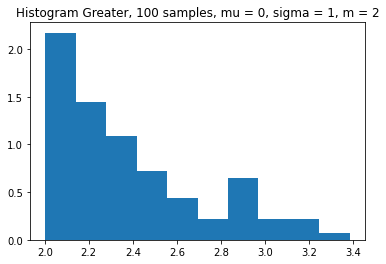

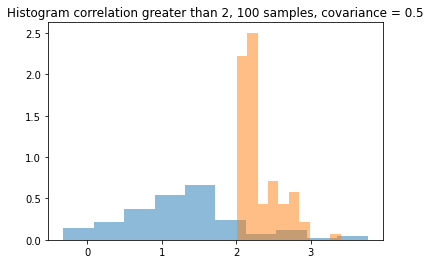

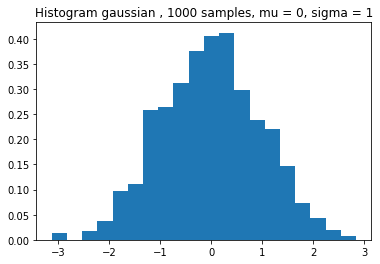

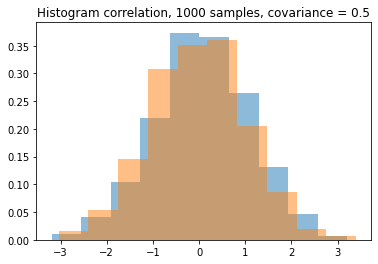

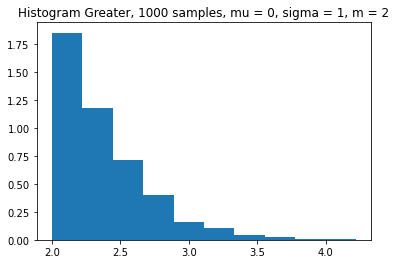

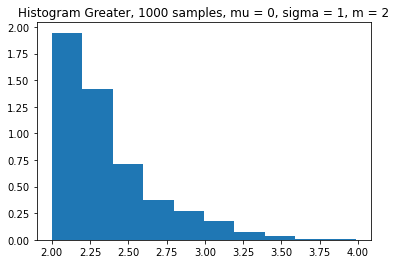

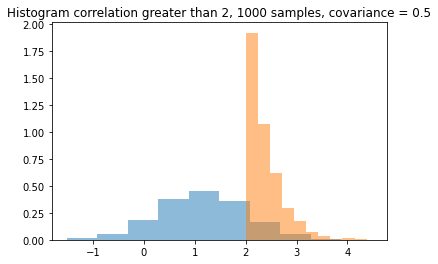

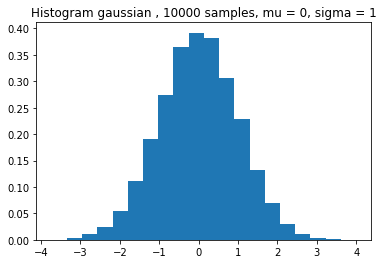

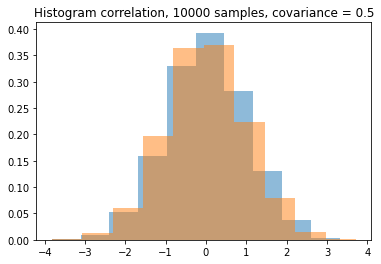

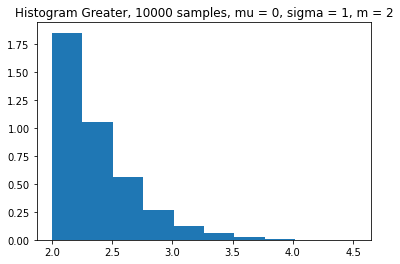

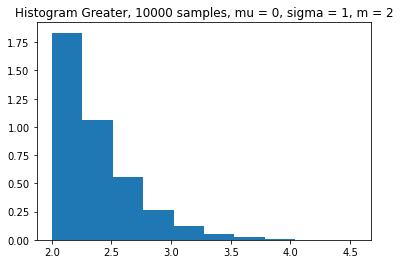

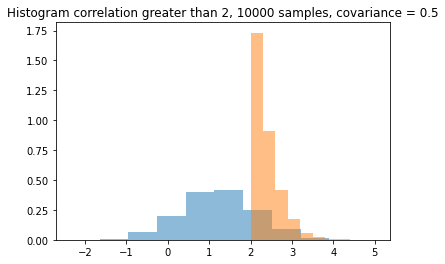

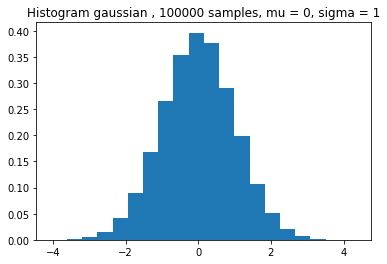

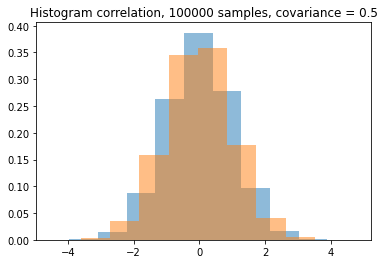

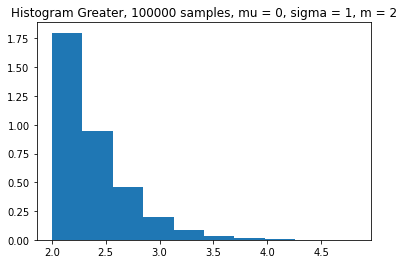

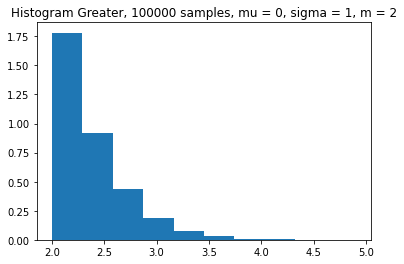

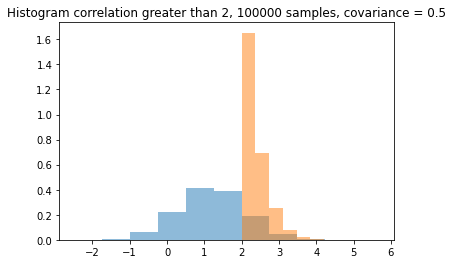

In [25]:
lst = [100, 1000, 10000, 100000]
for n in lst:
    plot_gaussian(n)
    plot_correlation(n, cov = 0.5)
    plot_greater(n, rejet = False)
    plot_greater(n, rejet= True)
    plot_cor_greater(n)  